# 추천 모델 최적의 가중치 테스트 

In [1]:
# 라이브러리 불러오기
import os
import sys
import warnings
import pickle 

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

In [2]:
# 경고 무시
warnings.filterwarnings(action='ignore')

In [3]:
# 모델 경로 불러오기
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('model'))))))

import model.model as md

# 모델 불러오기
model = md.recommendation()

In [4]:
# (윈도우 경로)
# 모델에서 사용할 임베딩 벡터 선언
# model.get_embedding_matrix('..\\..\\embeddings\\embedding_dict(wiki).pickle', 300)

In [5]:
# (맥 경로)
# 모델에서 사용할 임베딩 벡터 선언
model.get_embedding_matrix('../../embeddings/embedding(wiki).json', 300)

In [6]:
# 관심사 리스트 불러오기
model.preferences 

['travel',
 'fishing',
 'hiking',
 'biking',
 'workout',
 'golf',
 'pets',
 'plants',
 'religion',
 'food',
 'wine',
 'drinks',
 'movies',
 'photography',
 'arts',
 'singing',
 'music',
 'musical instrument',
 'reading',
 'fashion',
 'beauty',
 'investment',
 'interior design',
 'marriage']

In [7]:
# (윈도우 경로)
# 동일한 테스트 데이터 사용을 위해 pickle 파일 사용
# with open('..\\data\\test_li(wiki).pickle', 'rb') as j:
#     test_li = pickle.load(j)

# test_li

In [8]:
# (맥 경로)
# 동일한 테스트 데이터 사용을 위해 pickle 파일 사용
with open('../data/test_li(wiki).pickle', 'rb') as j:
    test_li = pickle.load(j)

test_li

[[0, ['movies', 'religion', 'marriage', 'workout']],
 [1, ['interior design', 'beauty', 'food', 'pets']],
 [2, ['fashion', 'arts', 'food', 'beauty']],
 [3, ['plants', 'religion', 'fishing', 'fashion']],
 [4, ['reading', 'musical instrument', 'pets', 'religion']],
 [5, ['reading', 'interior design', 'movies', 'investment']],
 [6, ['investment', 'musical instrument', 'wine', 'fishing']],
 [7, ['wine', 'biking', 'pets', 'singing']],
 [8, ['wine', 'biking', 'religion', 'fashion']],
 [9, ['singing', 'religion', 'drinks', 'musical instrument']],
 [10, ['hiking', 'religion', 'food', 'golf']],
 [11, ['workout', 'photography', 'music', 'food']],
 [12, ['pets', 'religion', 'wine', 'plants']],
 [13, ['fashion', 'photography', 'hiking', 'musical instrument']],
 [14, ['food', 'drinks', 'pets', 'biking']],
 [15, ['beauty', 'interior design', 'arts', 'plants']],
 [16, ['marriage', 'interior design', 'drinks', 'musical instrument']],
 [17, ['wine', 'movies', 'hiking', 'music']],
 [18, ['reading', 'mus

In [9]:
# 모델을 fit한 결과를 result로 저장  
# 클러스터 수 = 3
result = model.fit(test_li, n_cluster=3)

In [10]:
# PCA 시각화를 위해 유저 vector 리스트 제작
vectors = []
for i, p in test_li:
    vectors.append(model.get_vector(p))

In [11]:
# 2차원 그래프에 시각화하기 위해 PCA 진행(2차원으로 차원 축소)
pca = PCA(n_components= 2)
pca_vec = pca.fit_transform(vectors)

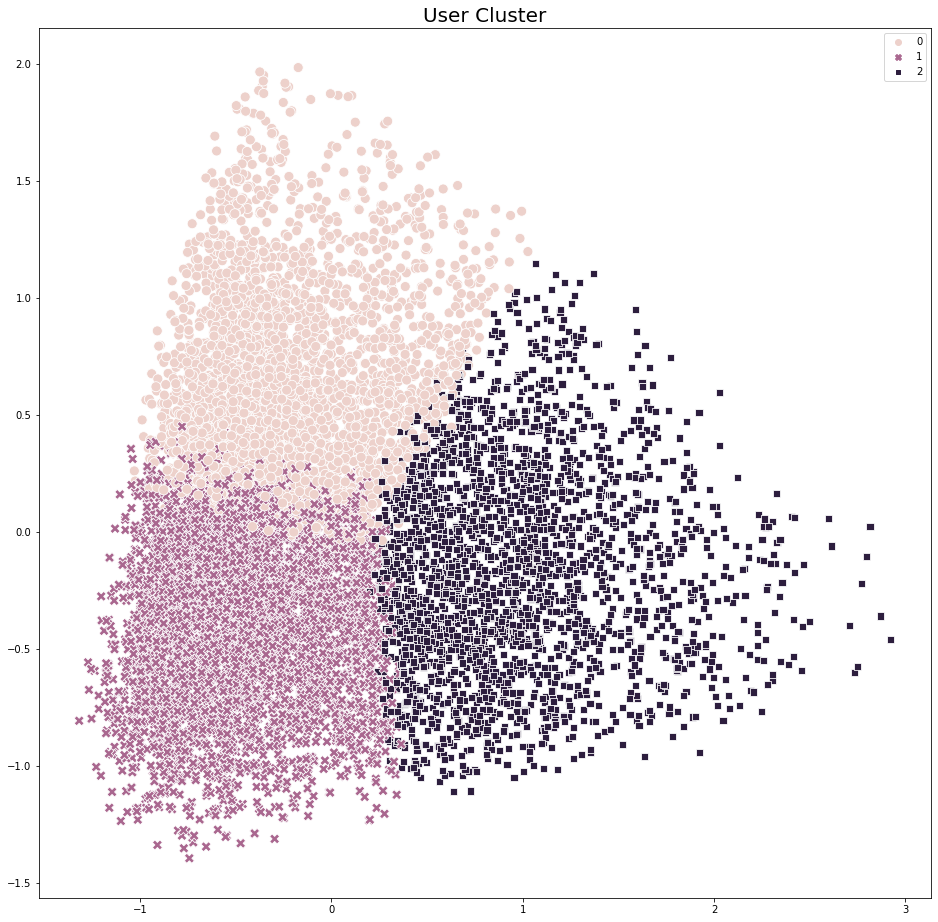

In [12]:
# User Cluster 시각화
fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(1, 1, 1)

sns.scatterplot(
    pca_vec[:,0],
    pca_vec[:,1],
    s=100,
    hue= model.cluster,
    style= model.cluster
    )

plt.title('User Cluster', loc='center', fontsize=20)
plt.show()

# 유저 군집마다 순위별로 어떤 관심사를 가지고 있는지 시각화를 통해 파악

In [13]:
# test_li 데이터셋을 데이터프레임으로 변형해 전체 그룹 데이터프레임 생성 
group = pd.DataFrame(test_li, columns = ['user_id', 'preferences'])
group

,user_id,preferences
0,0,"[movies, religion, marriage, workout]"
1,1,"[interior design, beauty, food, pets]"
2,2,"[fashion, arts, food, beauty]"
3,3,"[plants, religion, fishing, fashion]"
4,4,"[reading, musical instrument, pets, religion]"
...,...,...
9995,9995,"[marriage, workout, singing, fishing]"
9996,9996,"[music, musical instrument, fishing, drinks]"
9997,9997,"[beauty, pets, music, religion]"
9998,9998,"[workout, travel, investment, photography]"


## 0군집 유저

In [14]:
# 0군집 유저 
group0 = group[model.cluster == 0]

In [15]:
# 1순위 관심사 
prefer1 = [i[0] for i in group0['preferences']]
group0['prefer1'] = prefer1
print('<1순위 관심사>')
print(group0['prefer1'].value_counts())

<1순위 관심사>
food                  400
wine                  399
plants                366
drinks                347
pets                  226
investment            153
fishing               127
reading               124
travel                114
fashion               104
interior design       103
workout               103
religion               90
marriage               87
beauty                 83
movies                 59
singing                49
musical instrument     40
photography            37
music                  36
arts                   33
golf                   18
Name: prefer1, dtype: int64


In [16]:
# 2순위 관심사 
prefer2 = [i[1] for i in group0['preferences']]
group0['prefer2'] = prefer2
print('<2순위 관심사>')
print(group0['prefer2'].value_counts())

<2순위 관심사>
plants                321
drinks                300
food                  294
wine                  291
pets                  171
fishing               142
investment            122
religion              117
travel                115
reading               111
movies                107
workout               106
beauty                 97
marriage               96
interior design        93
fashion                93
musical instrument     93
golf                   84
music                  80
arts                   76
photography            70
singing                67
biking                 27
hiking                 25
Name: prefer2, dtype: int64


In [17]:
# 3순위 관심사 
prefer3 = [i[2] for i in group0['preferences']]
group0['prefer3'] = prefer3
print('<3순위 관심사>')
print(group0['prefer3'].value_counts())

<3순위 관심사>
wine                  198
plants                186
fishing               184
drinks                183
food                  182
pets                  156
marriage              156
investment            134
religion              132
golf                  125
interior design       124
workout               120
reading               116
musical instrument    115
beauty                115
fashion               112
travel                111
music                 105
photography            99
movies                 95
singing                95
arts                   87
biking                 84
hiking                 84
Name: prefer3, dtype: int64


In [18]:
# 4순위 관심사 
prefer4 = [i[3] for i in group0['preferences']]
group0['prefer4'] = prefer4
print('<4순위 관심사>')
print(group0['prefer4'].value_counts())

<4순위 관심사>
plants                163
food                  155
wine                  143
marriage              142
golf                  140
interior design       133
pets                  132
fishing               132
hiking                131
religion              131
photography           130
fashion               129
reading               128
movies                127
beauty                126
travel                125
drinks                124
biking                123
music                 118
arts                  115
musical instrument    113
investment            113
singing               113
workout               112
Name: prefer4, dtype: int64


In [19]:
# 관심사 분포 시각화를 위해 관심사 개수 카운트 
def val_cnt(df): 
    # 순위별로 관심사 value_counts - abc 순으로 정렬 
    df_prefer1_cnt = pd.DataFrame(df['prefer1'].value_counts()).sort_index()
    df_prefer2_cnt = pd.DataFrame(df['prefer2'].value_counts()).sort_index()
    df_prefer3_cnt = pd.DataFrame(df['prefer3'].value_counts()).sort_index()
    df_prefer4_cnt = pd.DataFrame(df['prefer4'].value_counts()).sort_index()
    # 순위별로 관심사 value_counts한 df를 관심사 abc 순으로 하나로 합치기 
    df_concat = pd.concat([df_prefer2_cnt, df_prefer3_cnt, df_prefer4_cnt, df_prefer1_cnt], axis=1)
    # 컬럼 순서 변경 - 1순위, 2순위, 3순위, 4순위
    df_concat = df_concat[['prefer1', 'prefer2', 'prefer3', 'prefer4']]
    # 인덱스 reset 후 'prefer'로 컬럼명 변경 
    final_df = df_concat.reset_index(drop=False)
    final_df.rename(columns={'index':'prefer'}, inplace=True)

    # 결측치 0으로 대체
    final_df.fillna(0,inplace=True)
    # 'prefer1' 컬럼 데이터타입 변경 float -> int 
    final_df = final_df.astype({'prefer1':'int'})

    # model.preferences 순으로 정렬하기 위한 딕셔너리 생성
    sorterIndex = dict(zip(model.preferences, range(len(model.preferences))))
    # 해당 딕셔너리를 이용해 정렬을 위한 'sorter' 컬럼 생성
    df_sort = final_df
    df_sort['sorter'] = df_sort['prefer'].map(sorterIndex)
    # 'sorter' 컬럼을 기준으로 정렬
    df_sort.sort_values('sorter',inplace=True)
    # 'sorter' 컬럼 삭제
    df_sort.drop('sorter', 1, inplace=True)
    # 인덱스 reset 
    df_sort.reset_index(drop=True, inplace=True)

    return df_sort

In [20]:
# 시각화를 위해 tidy 형태로 변환 
def to_tidy(df): 
    df_tidy = pd.melt(df, id_vars=['prefer'], value_vars=['prefer1', 'prefer2', 'prefer3', 'prefer4'],
                      var_name='rank', value_name='count')
    return df_tidy  

In [21]:
# val_cnt 함수 적용
g0_prefer_cnt = val_cnt(group0)
g0_prefer_cnt 

,prefer,prefer1,prefer2,prefer3,prefer4
0,travel,114,115,111,125
1,fishing,127,142,184,132
2,hiking,0,25,84,131
3,biking,0,27,84,123
4,workout,103,106,120,112
5,golf,18,84,125,140
6,pets,226,171,156,132
7,plants,366,321,186,163
8,religion,90,117,132,131
9,food,400,294,182,155


In [22]:
# to_tidy 함수 적용 
g0_tidy = to_tidy(g0_prefer_cnt)
g0_tidy 

,prefer,rank,count
0,travel,prefer1,114
1,fishing,prefer1,127
2,hiking,prefer1,0
3,biking,prefer1,0
4,workout,prefer1,103
...,...,...,...
91,fashion,prefer4,129
92,beauty,prefer4,126
93,investment,prefer4,113
94,interior design,prefer4,133


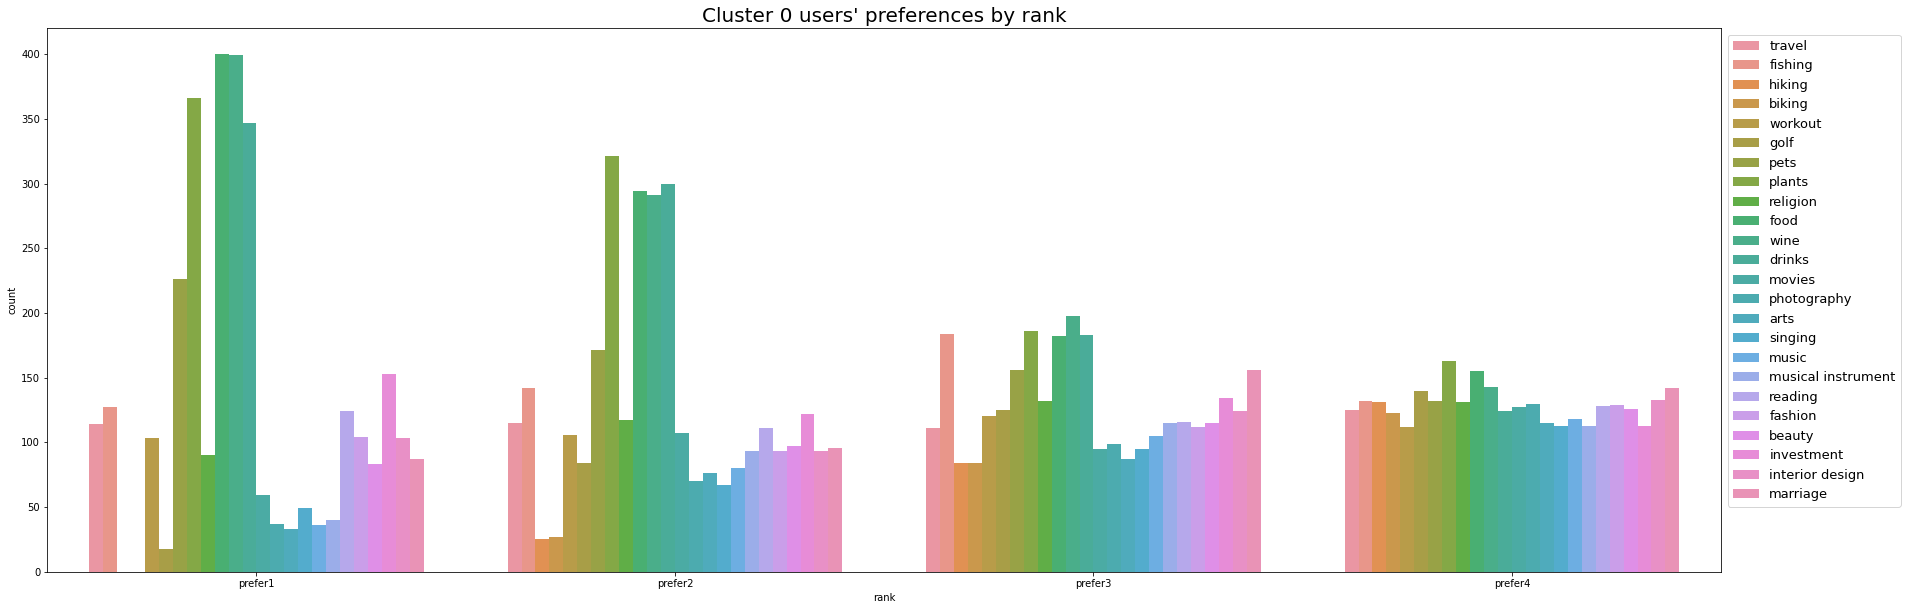

In [23]:
# 0군집 유저의 순위별 관심사 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g0_tidy, x='rank', y='count', hue='prefer')
plt.title("Cluster 0 users' preferences by rank", loc='center', fontsize=20)
plt.legend(fontsize=13, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

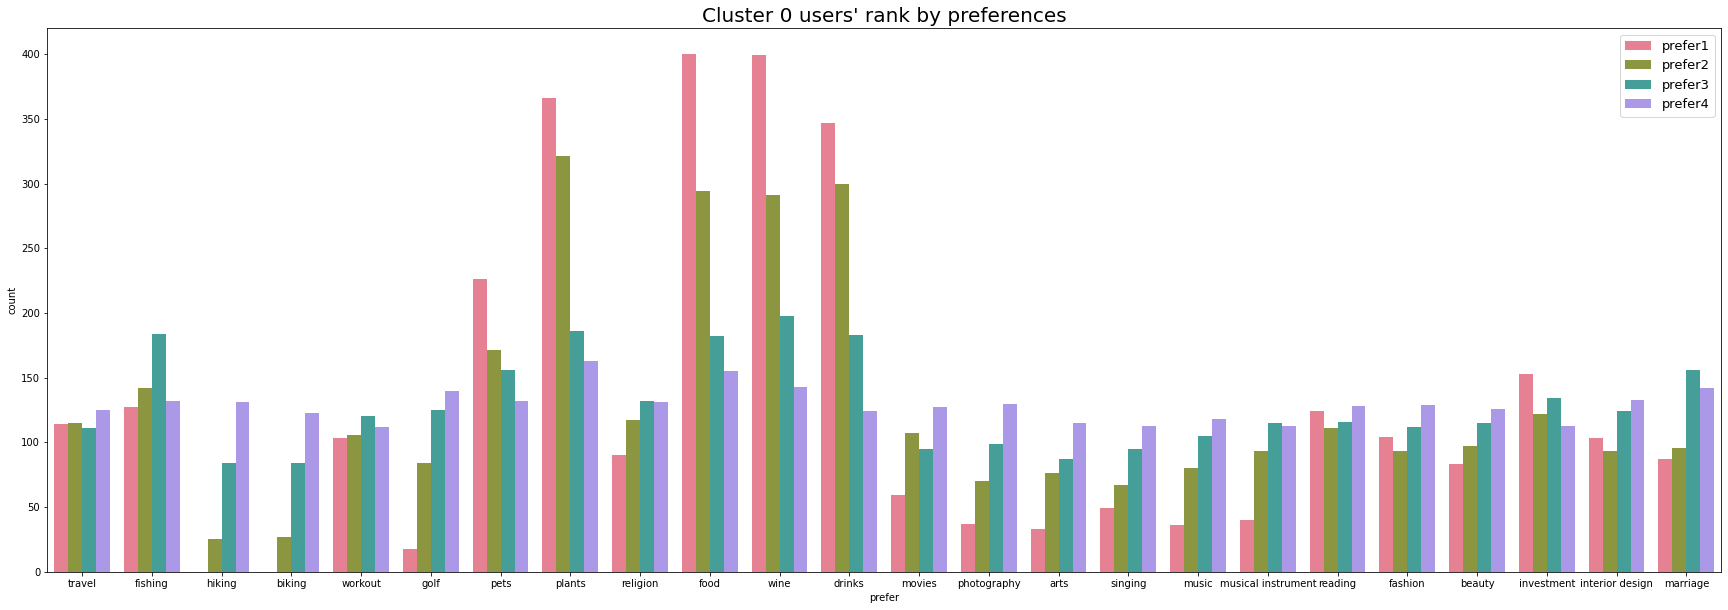

In [24]:
# 0군집 유저의 관심사별 순위 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g0_tidy, x='prefer', y='count', hue='rank', palette='husl')
plt.title("Cluster 0 users' rank by preferences", loc='center', fontsize=20)
plt.legend(fontsize=13)
plt.show()

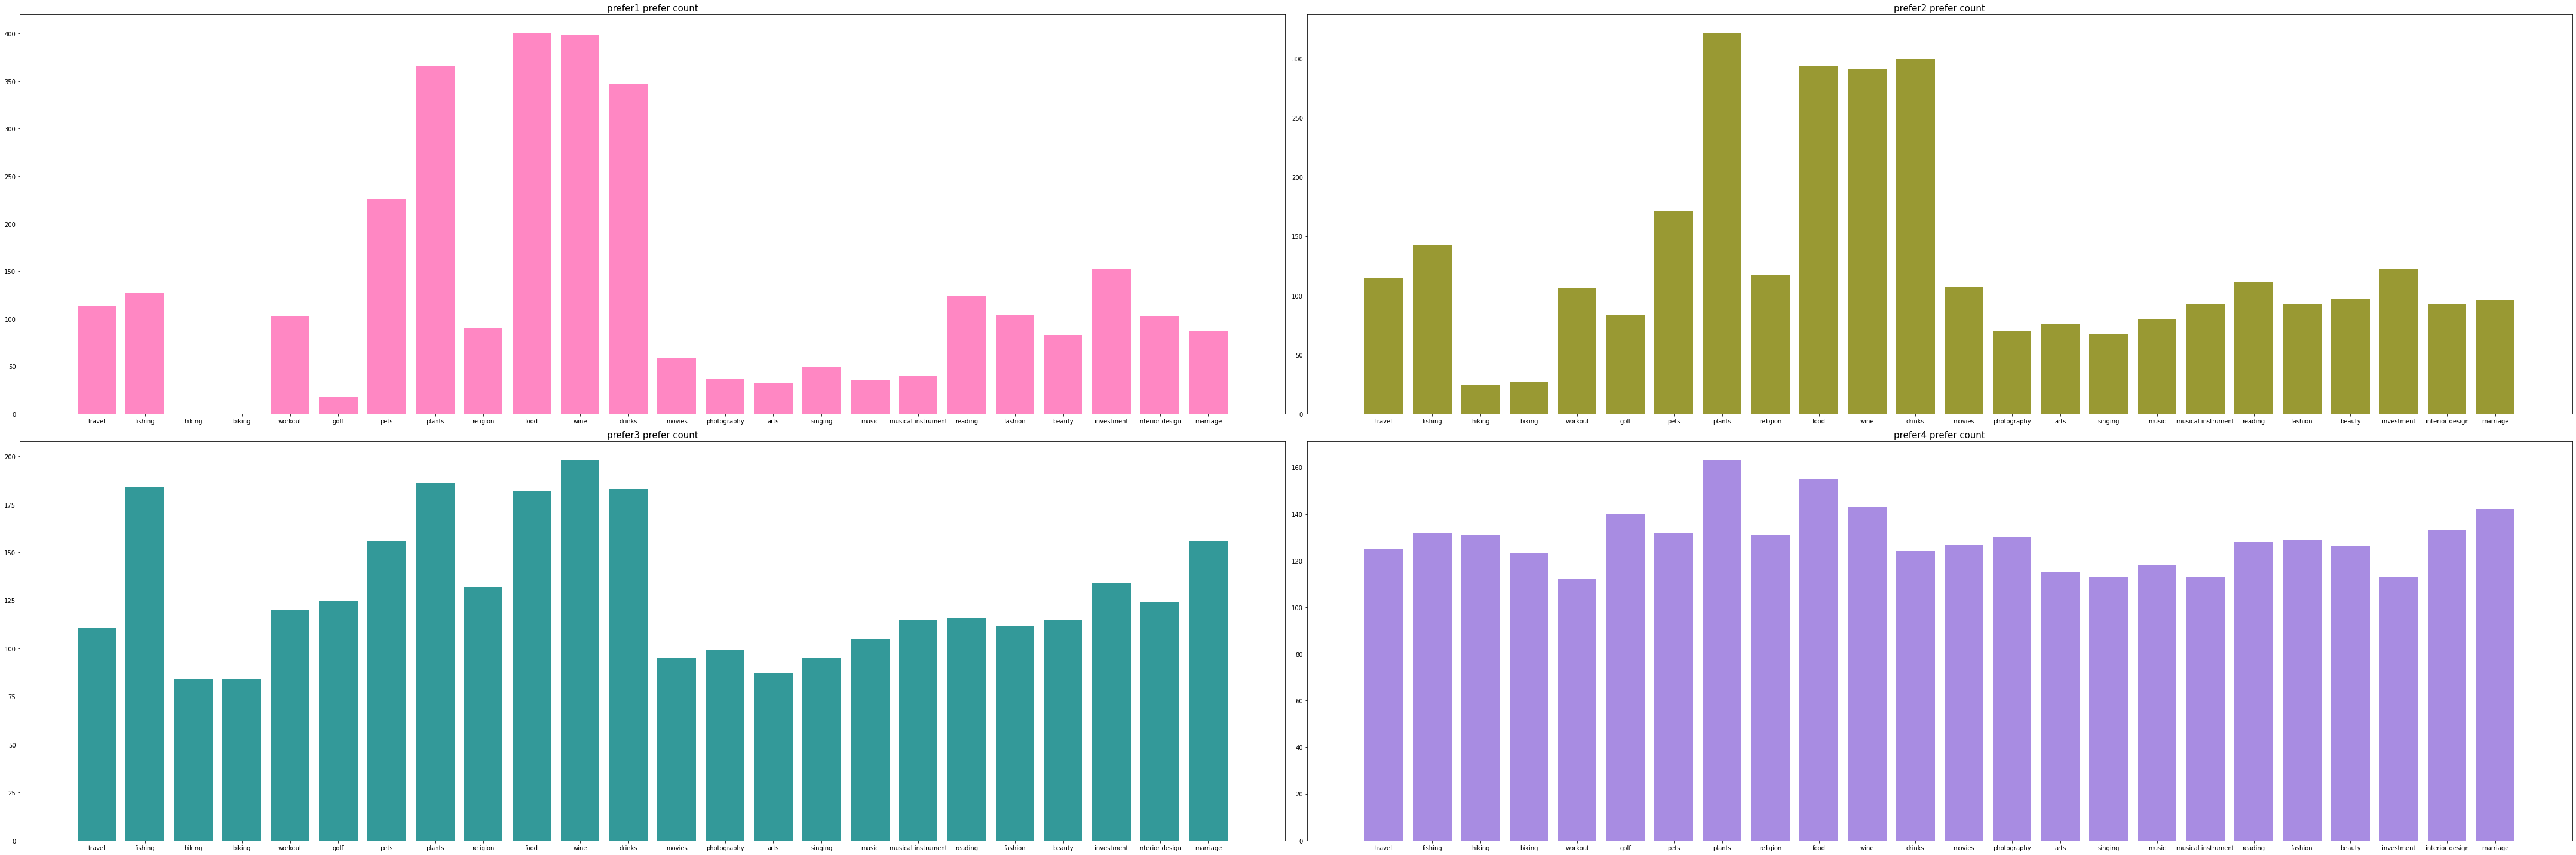

In [25]:
# 순위별 관심사 분포 
rnk = ['prefer1', 'prefer2', 'prefer3', 'prefer4']

plt.figure(figsize=(60,20)) 
colors = ['white', 'hotpink', 'olive', 'teal', 'mediumpurple']
n=1
for r_ in rnk:
    d_ = g0_tidy[(g0_tidy['rank']== r_)]
    plt.subplot(2,2,n) 
    plt.title("%s prefer count" % r_, fontsize=15)
    plt.bar(d_["prefer"], d_["count"], alpha=0.8, color=colors[n])
    plt.xticks(rotation=360)
    n+=1
plt.tight_layout()  
plt.show()

## 1군집 유저 

In [26]:
# 1군집 유저 
group1 = group[model.cluster == 1]

In [27]:
# 1순위 관심사 
prefer1 = [i[0] for i in group1['preferences']]
group1['prefer1'] = prefer1
print('<1순위 관심사>')
print(group1['prefer1'].value_counts())

<1순위 관심사>
musical instrument    358
music                 353
arts                  334
singing               308
photography           288
religion              273
movies                270
fashion               258
marriage              256
reading               255
beauty                243
interior design       228
investment            209
workout               201
travel                197
pets                  106
fishing                31
golf                   14
plants                  2
wine                    1
Name: prefer1, dtype: int64


In [28]:
# 2순위 관심사 
prefer2 = [i[1] for i in group1['preferences']]
group1['prefer2'] = prefer2
print('<2순위 관심사>')
print(group1['prefer2'].value_counts())

<2순위 관심사>
music                 279
arts                  269
photography           265
musical instrument    253
religion              250
marriage              246
movies                245
singing               239
fashion               234
interior design       227
beauty                221
workout               220
reading               215
investment            201
travel                194
pets                  155
fishing               123
golf                  114
food                   63
wine                   55
plants                 52
drinks                 50
biking                 12
hiking                  3
Name: prefer2, dtype: int64


In [29]:
# 3순위 관심사 
prefer3 = [i[2] for i in group1['preferences']]
group1['prefer3'] = prefer3
print('<3순위 관심사>')
print(group1['prefer3'].value_counts())

<3순위 관심사>
music                 230
marriage              220
religion              215
workout               211
fashion               211
photography           210
beauty                208
singing               206
arts                  197
interior design       196
musical instrument    194
movies                187
investment            181
travel                181
reading               177
pets                  165
golf                  164
fishing               135
plants                123
food                  122
wine                  120
drinks                118
biking                116
hiking                 98
Name: prefer3, dtype: int64


In [30]:
# 4순위 관심사 
prefer4 = [i[3] for i in group1['preferences']]
group1['prefer4'] = prefer4
print('<4순위 관심사>')
print(group1['prefer4'].value_counts())

<4순위 관심사>
musical instrument    212
food                  200
workout               198
music                 195
fishing               187
reading               186
photography           182
marriage              181
singing               180
investment            177
pets                  176
wine                  174
movies                170
biking                170
fashion               168
drinks                168
arts                  168
religion              166
golf                  165
beauty                164
travel                163
interior design       151
hiking                147
plants                137
Name: prefer4, dtype: int64


In [31]:
# val_cnt 함수 적용
g1_prefer_cnt = val_cnt(group1)
g1_prefer_cnt

,prefer,prefer1,prefer2,prefer3,prefer4
0,travel,197,194,181,163
1,fishing,31,123,135,187
2,hiking,0,3,98,147
3,biking,0,12,116,170
4,workout,201,220,211,198
5,golf,14,114,164,165
6,pets,106,155,165,176
7,plants,2,52,123,137
8,religion,273,250,215,166
9,food,0,63,122,200


In [32]:
# to_tidy 함수 적용 
g1_tidy = to_tidy(g1_prefer_cnt)
g1_tidy 

,prefer,rank,count
0,travel,prefer1,197
1,fishing,prefer1,31
2,hiking,prefer1,0
3,biking,prefer1,0
4,workout,prefer1,201
...,...,...,...
91,fashion,prefer4,168
92,beauty,prefer4,164
93,investment,prefer4,177
94,interior design,prefer4,151


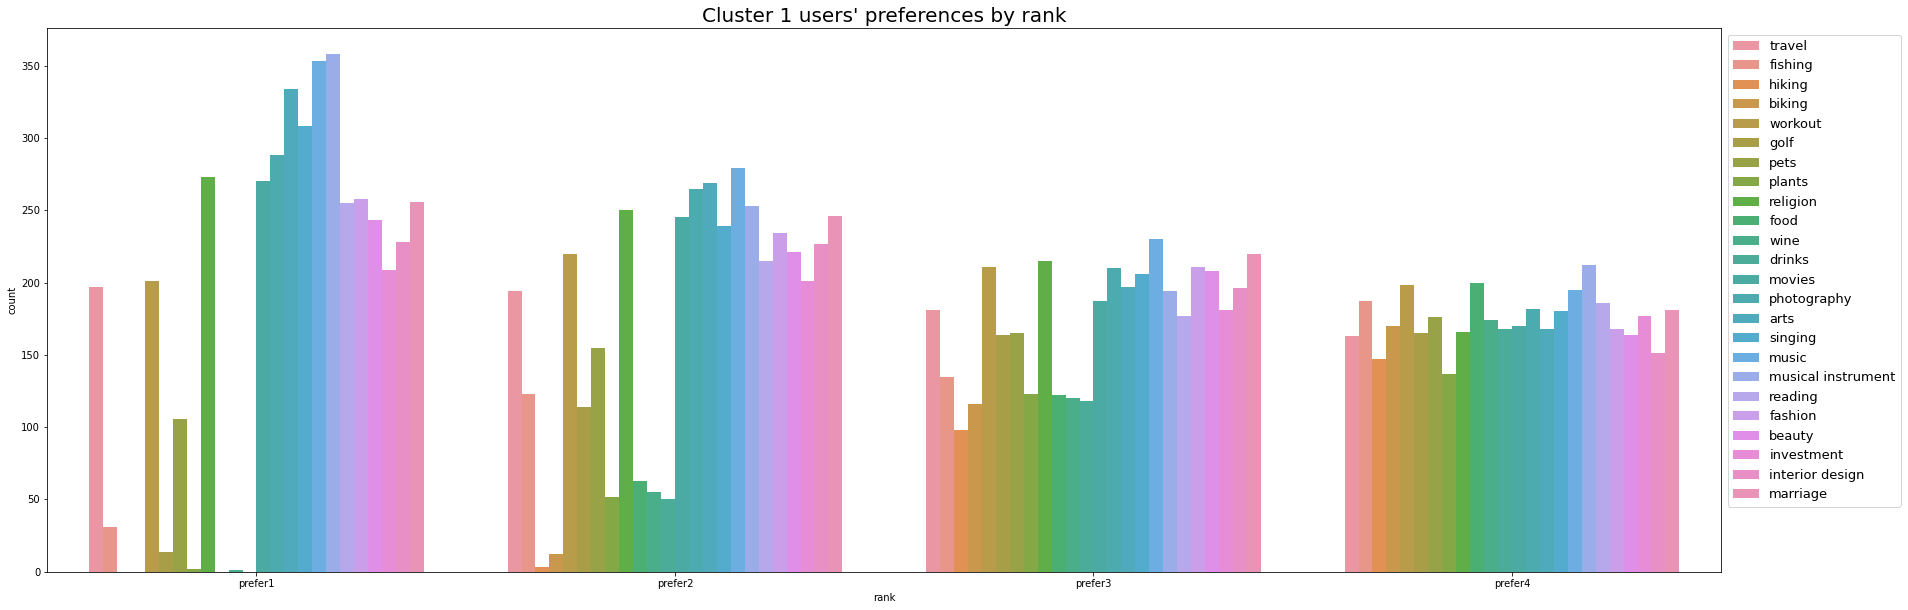

In [33]:
# 1군집 유저의 순위별 관심사 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g1_tidy, x='rank', y='count', hue='prefer')
plt.title("Cluster 1 users' preferences by rank", loc='center', fontsize=20)
plt.legend(fontsize=13, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

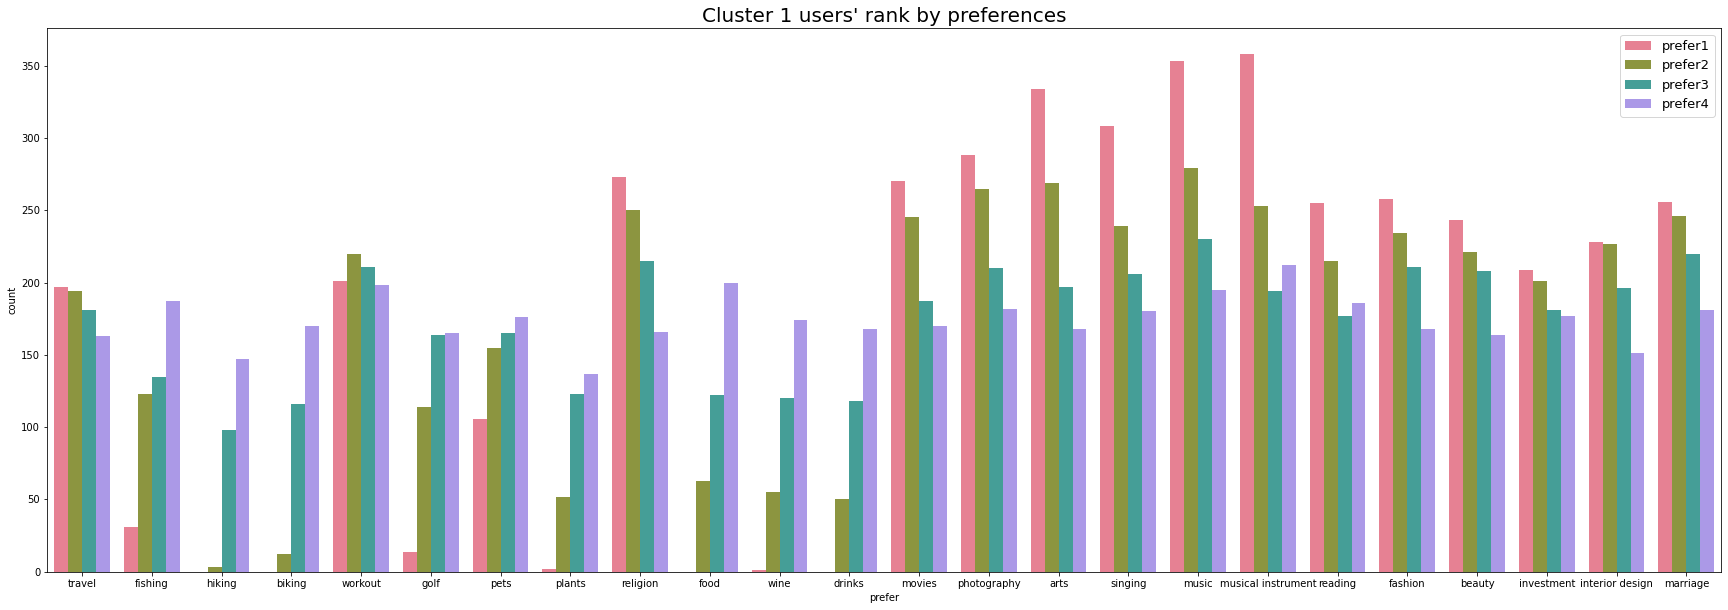

In [34]:
# 1군집 유저의 관심사별 순위 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g1_tidy, x='prefer', y='count', hue='rank', palette='husl')
plt.title("Cluster 1 users' rank by preferences", loc='center', fontsize=20)
plt.legend(fontsize=13)
plt.show()

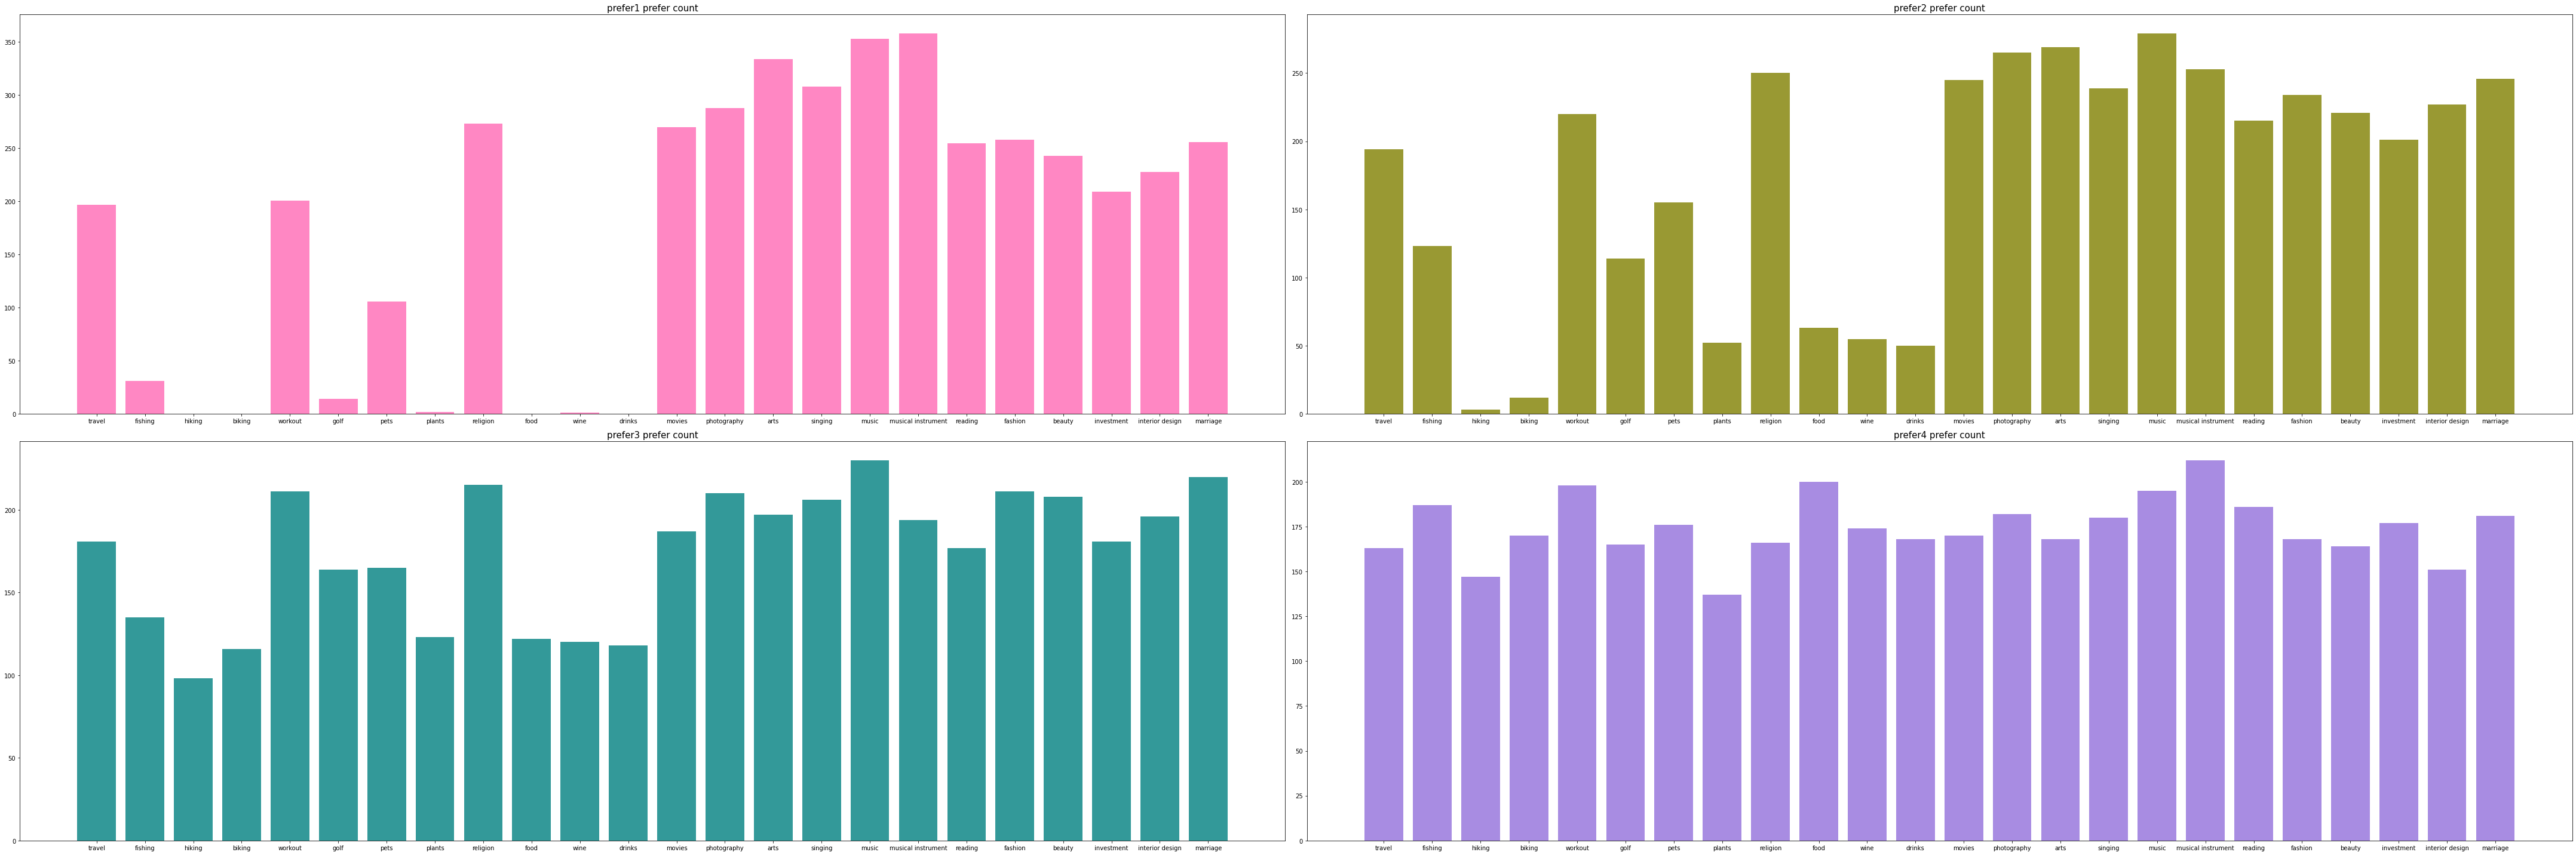

In [35]:
# 순위별 관심사 분포 
rnk = ['prefer1', 'prefer2', 'prefer3', 'prefer4']

plt.figure(figsize=(60,20)) 
colors = ['white', 'hotpink', 'olive', 'teal', 'mediumpurple']
n=1
for r_ in rnk:
    d_ = g1_tidy[(g1_tidy['rank']== r_)]
    plt.subplot(2,2,n) 
    plt.title("%s prefer count" % r_, fontsize=15)
    plt.bar(d_["prefer"], d_["count"], alpha=0.8, color=colors[n])
    plt.xticks(rotation=360)
    n+=1
plt.tight_layout()  
plt.show()

## 2군집 유저

In [36]:
# 2군집 유저 
group2 = group[model.cluster == 2]

In [37]:
# 1순위 관심사 
prefer1 = [i[0] for i in group2['preferences']]
group2['prefer1'] = prefer1
print('<1순위 관심사>')
print(group2['prefer1'].value_counts())

<1순위 관심사>
hiking                454
biking                432
golf                  372
fishing               254
workout               117
travel                116
pets                   95
photography            80
interior design        75
reading                71
singing                70
beauty                 67
investment             67
movies                 64
arts                   47
music                  47
religion               46
marriage               45
fashion                41
plants                 35
drinks                 33
food                   31
musical instrument     30
wine                   28
Name: prefer1, dtype: int64


In [38]:
# 2순위 관심사 
prefer2 = [i[1] for i in group2['preferences']]
group2['prefer2'] = prefer2
print('<2순위 관심사>')
print(group2['prefer2'].value_counts())

<2순위 관심사>
hiking                395
biking                393
golf                  238
fishing               173
travel                104
photography           101
interior design        94
workout                94
marriage               87
singing                85
religion               79
wine                   79
movies                 79
pets                   77
beauty                 75
arts                   74
investment             74
food                   69
music                  62
drinks                 60
plants                 59
reading                58
fashion                56
musical instrument     52
Name: prefer2, dtype: int64


In [39]:
# 3순위 관심사 
prefer3 = [i[2] for i in group2['preferences']]
group2['prefer3'] = prefer3
print('<3순위 관심사>')
print(group2['prefer3'].value_counts())

<3순위 관심사>
hiking                222
biking                196
golf                  146
workout               134
fishing               130
photography           128
travel                127
reading               115
pets                  110
religion              109
music                 107
beauty                106
interior design       103
drinks                101
singing               100
movies                 98
arts                   95
wine                   95
food                   92
fashion                90
musical instrument     84
plants                 84
investment             81
marriage               64
Name: prefer3, dtype: int64


In [40]:
# 4순위 관심사 
prefer4 = [i[3] for i in group2['preferences']]
group2['prefer4'] = prefer4 
print('<4순위 관심사>')
print(group2['prefer4'].value_counts())

<4순위 관심사>
golf                  131
biking                128
investment            125
workout               124
music                 124
reading               122
singing               120
hiking                118
movies                117
wine                  116
food                  115
marriage              115
plants                113
religion              109
musical instrument    109
fashion               108
interior design       107
drinks                107
arts                  105
travel                105
fishing               101
beauty                101
photography            99
pets                   98
Name: prefer4, dtype: int64


In [41]:
# val_cnt 함수 적용
g2_prefer_cnt = val_cnt(group2)
g2_prefer_cnt

,prefer,prefer1,prefer2,prefer3,prefer4
0,travel,116,104,127,105
1,fishing,254,173,130,101
2,hiking,454,395,222,118
3,biking,432,393,196,128
4,workout,117,94,134,124
5,golf,372,238,146,131
6,pets,95,77,110,98
7,plants,35,59,84,113
8,religion,46,79,109,109
9,food,31,69,92,115


In [42]:
# to_tidy 함수 적용 
g2_tidy = to_tidy(g2_prefer_cnt)
g2_tidy 

,prefer,rank,count
0,travel,prefer1,116
1,fishing,prefer1,254
2,hiking,prefer1,454
3,biking,prefer1,432
4,workout,prefer1,117
...,...,...,...
91,fashion,prefer4,108
92,beauty,prefer4,101
93,investment,prefer4,125
94,interior design,prefer4,107


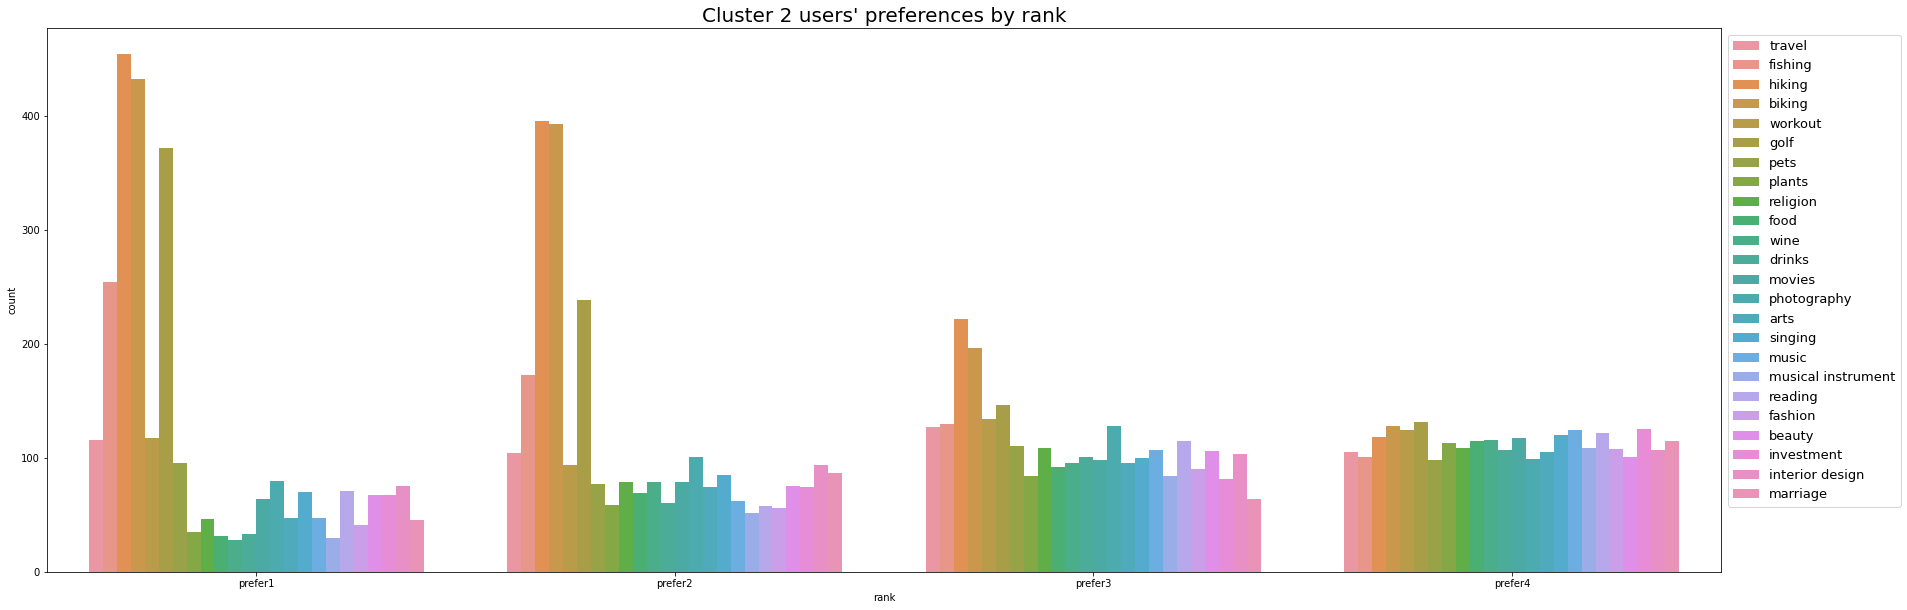

In [43]:
# 2군집 유저의 순위별 관심사 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g2_tidy, x='rank', y='count', hue='prefer')
plt.title("Cluster 2 users' preferences by rank", loc='center', fontsize=20)
plt.legend(fontsize=13, bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

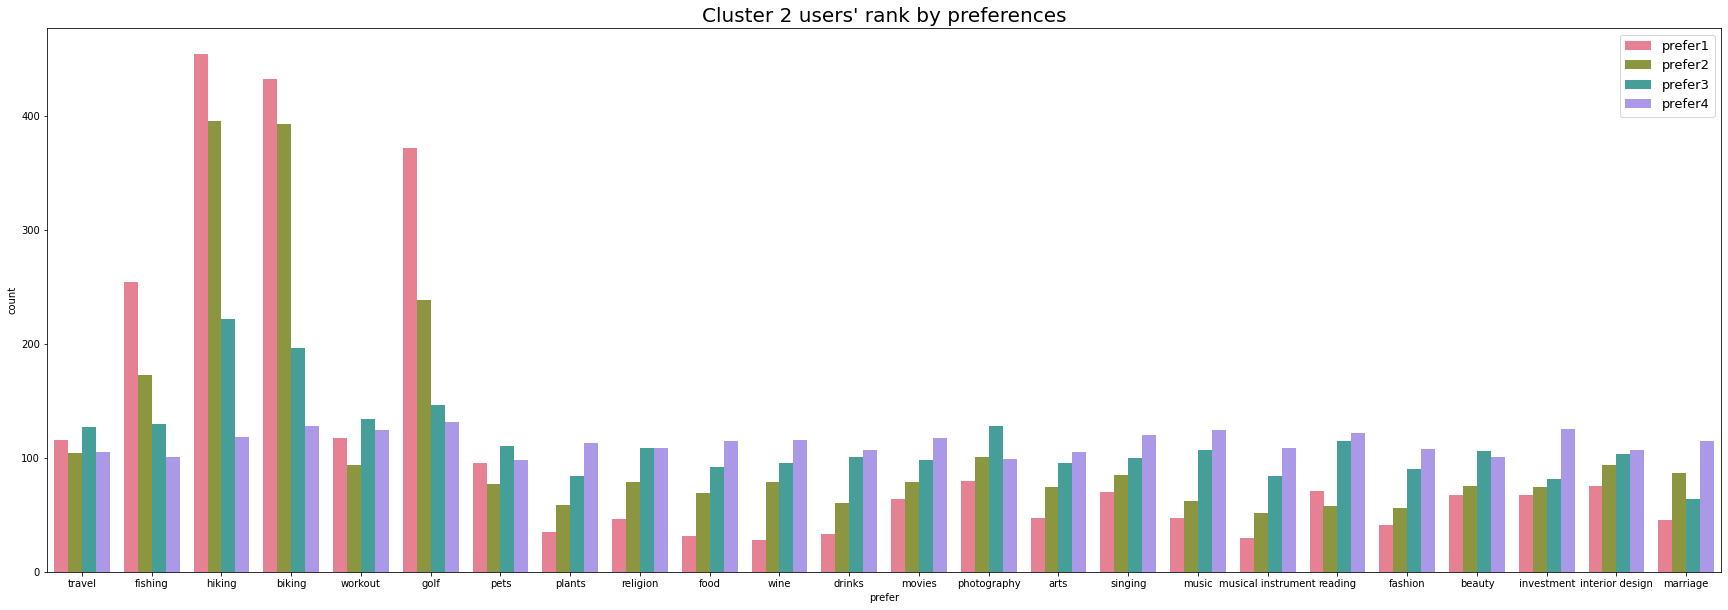

In [44]:
# 2군집 유저의 관심사별 순위 분포
plt.figure(figsize=(30, 10))
sns.barplot(data=g2_tidy, x='prefer', y='count', hue='rank', palette='husl')
plt.title("Cluster 2 users' rank by preferences", loc='center', fontsize=20)
plt.legend(fontsize=13)
plt.show()

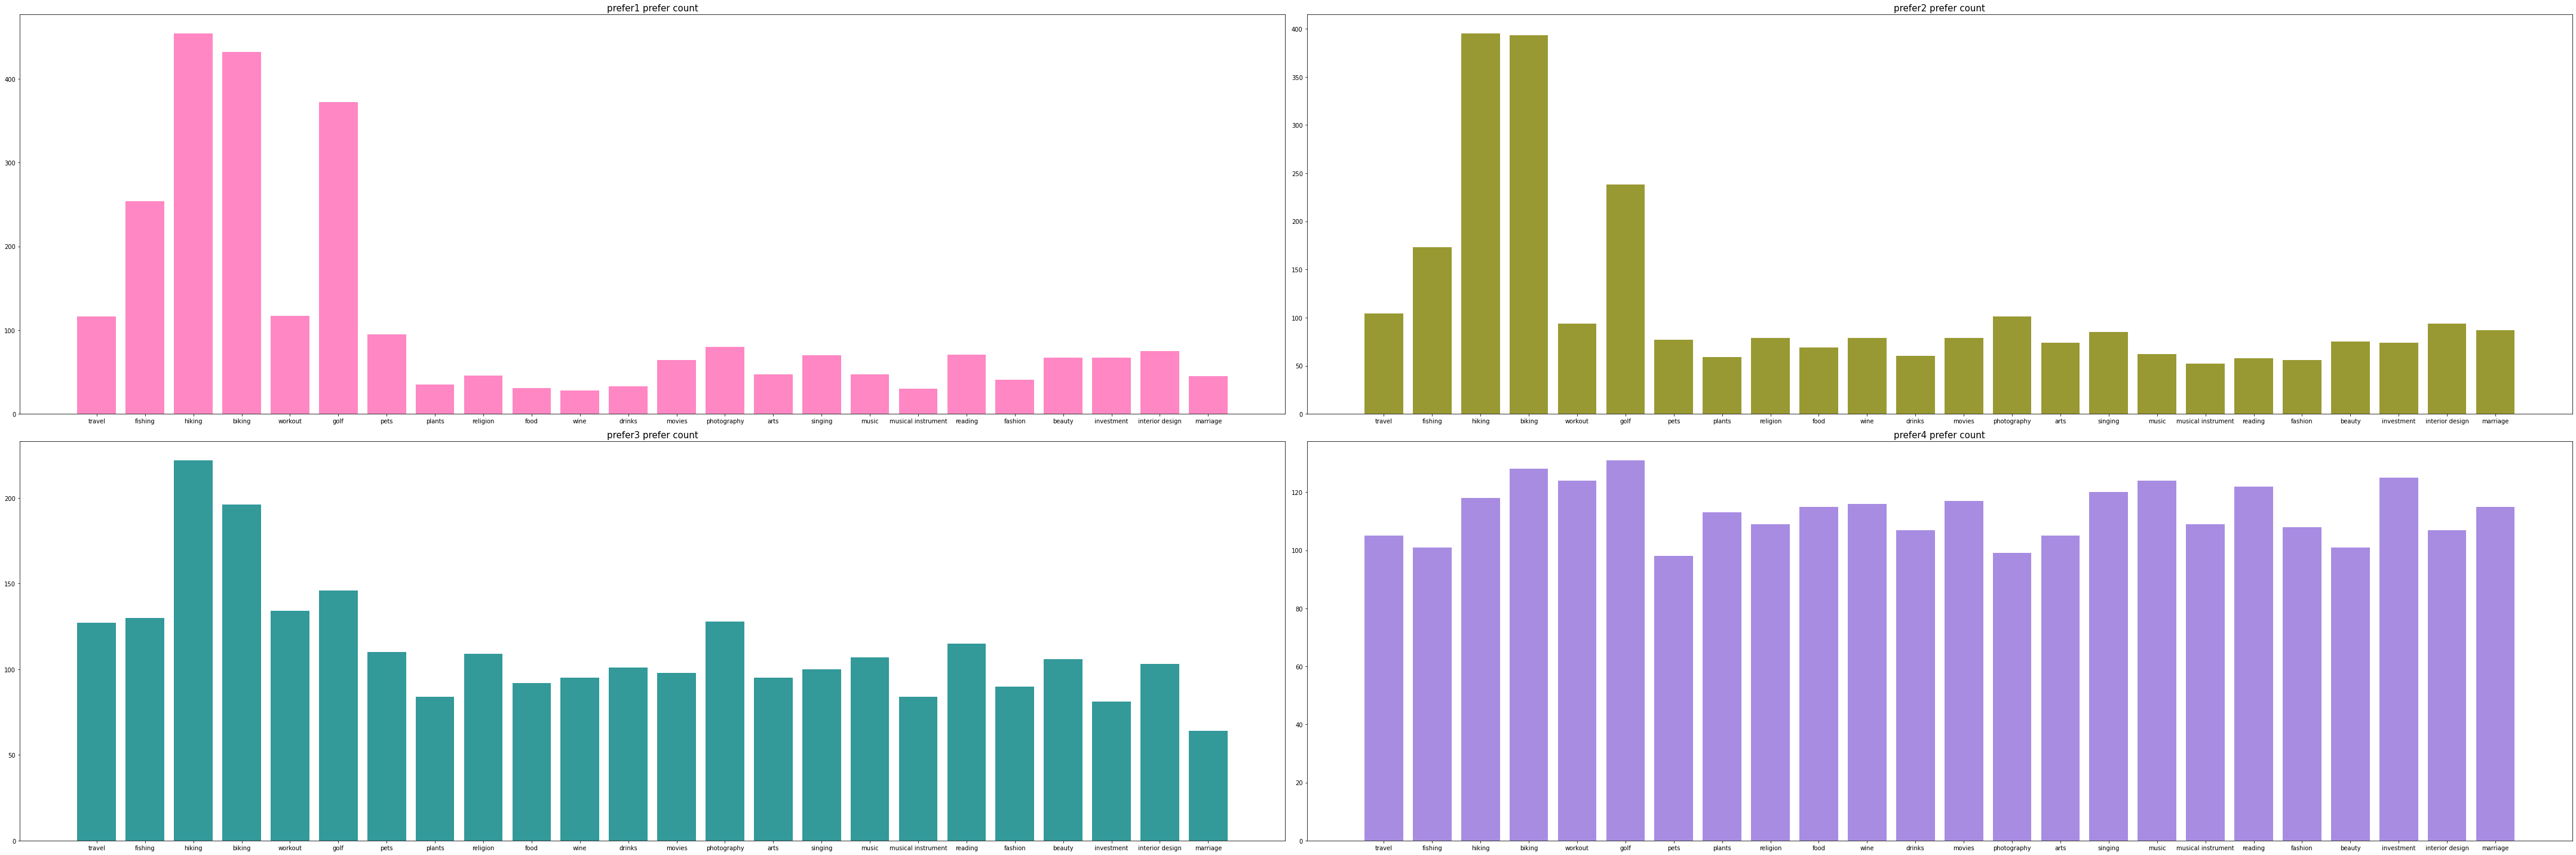

In [45]:
# 순위별 관심사 분포 
rnk = ['prefer1', 'prefer2', 'prefer3', 'prefer4']

plt.figure(figsize=(60,20)) 
colors = ['white', 'hotpink', 'olive', 'teal', 'mediumpurple']
n=1
for r_ in rnk:
    d_ = g2_tidy[(g2_tidy['rank']== r_)]
    plt.subplot(2,2,n) 
    plt.title("%s prefer count" % r_, fontsize=15)
    plt.bar(d_["prefer"], d_["count"], alpha=0.8, color=colors[n])
    plt.xticks(rotation=360)
    n+=1
plt.tight_layout()  
plt.show()